In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [81]:
df_fire_2022 = pd.read_csv('WFIGS_-_2022_Wildland_Fire_Locations_to_Date.csv', na_values=[''], converters={'FireDiscoveryDateTime': pd.to_datetime})
df_fire_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39530 entries, 0 to 39529
Data columns (total 96 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   X                                39530 non-null  float64            
 1   Y                                39530 non-null  float64            
 2   OBJECTID                         39530 non-null  int64              
 3   ABCDMisc                         2270 non-null   object             
 4   ADSPermissionState               39530 non-null  object             
 5   CalculatedAcres                  549 non-null    float64            
 6   ContainmentDateTime              24273 non-null  object             
 7   ControlDateTime                  20704 non-null  object             
 8   DailyAcres                       30105 non-null  float64            
 9   DiscoveryAcres                   34824 non-null  float64            
 10

/var/folders/xb/3kyhyk0s6zv0y_tv20yntjcr0000gn/T/ipykernel_6781/2350239475.py:1: DtypeWarning: Columns (14,32,61,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df_fire_2022 = pd.read_csv('WFIGS_-_2022_Wildland_Fire_Locations_to_Date.csv', na_values=[''], converters={'FireDiscoveryDateTime': pd.to_datetime})


In [82]:
CA_fire_2022_df = df_fire_2022[df_fire_2022['POODispatchCenterID'].str.startswith('CA', na=False)]
CA_fire_2022_df.head()

,X,Y,OBJECTID,ABCDMisc,ADSPermissionState,CalculatedAcres,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,...,IsDispatchComplete,OrganizationalAssessment,StrategicDecisionPublishDate,CreatedOnDateTime_dt,ModifiedOnDateTime_dt,Source,GlobalID,IsCpxChild,CpxName,CpxID
1,-117.226312,33.942359,236862,NaN,DEFAULT,NaN,NaN,NaN,NaN,0.10,...,0,NaN,NaN,2022/01/01 11:13:42+00,2022/01/01 11:13:42+00,IRWIN,{5E03F67E-7D71-4534-AE65-0507FC23C660},NaN,NaN,NaN
2,-120.634672,35.164286,236877,NaN,DEFAULT,NaN,2022/01/01 16:18:27+00,2022/01/01 18:45:00+00,0.01,0.01,...,0,NaN,NaN,2022/01/01 15:21:58+00,2022/06/24 01:26:38+00,IRWIN,{391610DE-D34B-49A4-A57C-8DAFD6D8BBC7},0.0,NaN,NaN
5,-117.340872,33.690858,236947,NaN,DEFAULT,NaN,NaN,NaN,NaN,0.10,...,0,NaN,NaN,2022/01/01 21:00:26+00,2022/01/01 21:00:26+00,IRWIN,{F3580DF9-15FD-4494-8E78-F11B36AAEAA7},NaN,NaN,NaN
6,-116.932143,34.863903,236958,NaN,DEFAULT,NaN,NaN,NaN,NaN,0.10,...,0,NaN,NaN,2022/01/01 22:44:37+00,2022/01/01 22:44:37+00,IRWIN,{DD881A6C-7D34-4188-BBFE-3C8A3394A472},NaN,NaN,NaN
9,-116.078413,33.569696,236966,NaN,DEFAULT,NaN,NaN,NaN,NaN,0.10,...,0,NaN,NaN,2022/01/02 02:16:24+00,2022/01/02 02:24:59+00,IRWIN,{6A70E1F6-17F7-496B-BFEA-2B980FA4B671},NaN,NaN,NaN


In [83]:
CA_fire_2022_df['POOCounty'].value_counts()

Riverside         3647
Los Angeles       2822
Fresno             630
San Bernardino     427
Merced             387
                  ... 
Douglas              4
Kauai                3
Jackson              2
Honolulu             1
Carson City          1
Name: POOCounty, Length: 66, dtype: int64

In [84]:
df_historical_data = pd.read_csv('WFIGS_-_Wildland_Fire_Locations_Full_History.csv', na_values=[''], converters={'FireDiscoveryDateTime': pd.to_datetime})
df_historical_data.info()

/var/folders/xb/3kyhyk0s6zv0y_tv20yntjcr0000gn/T/ipykernel_6781/1981588489.py:1: DtypeWarning: Columns (13,14,16,32,61,64,68,69,77,78,94,95) have mixed types. Specify dtype option on import or set low_memory=False.
  df_historical_data = pd.read_csv('WFIGS_-_Wildland_Fire_Locations_Full_History.csv', na_values=[''], converters={'FireDiscoveryDateTime': pd.to_datetime})


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246580 entries, 0 to 246579
Data columns (total 96 columns):
 #   Column                           Non-Null Count   Dtype              
---  ------                           --------------   -----              
 0   X                                246580 non-null  float64            
 1   Y                                246580 non-null  float64            
 2   OBJECTID                         246580 non-null  int64              
 3   ABCDMisc                         12940 non-null   object             
 4   ADSPermissionState               246580 non-null  object             
 5   CalculatedAcres                  5349 non-null    float64            
 6   ContainmentDateTime              149988 non-null  object             
 7   ControlDateTime                  135647 non-null  object             
 8   DailyAcres                       171896 non-null  float64            
 9   DiscoveryAcres                   182417 non-null  float64  

In [85]:
CA_his_df = df_historical_data[df_historical_data['POODispatchCenterID'].str.startswith('CA', na=False)]
CA_his_df.head()

,X,Y,OBJECTID,ABCDMisc,ADSPermissionState,CalculatedAcres,ContainmentDateTime,ControlDateTime,DailyAcres,DiscoveryAcres,...,IsDispatchComplete,OrganizationalAssessment,StrategicDecisionPublishDate,CreatedOnDateTime_dt,ModifiedOnDateTime_dt,Source,GlobalID,IsCpxChild,CpxName,CpxID
1,-118.180712,33.808985,2,NaN,DEFAULT,NaN,NaN,NaN,NaN,0.1,...,0,NaN,NaN,2020/02/28 20:52:36+00,2020/02/28 20:52:36+00,IRWIN,{0E79B7FD-2882-43CF-8CFA-911BD1C8F77A},NaN,NaN,NaN
3,-117.153901,33.176394,4,NaN,DEFAULT,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,2019/07/01 20:10:12+00,2019/07/01 20:10:12+00,IRWIN,{5DF06F41-9948-49D3-B00A-2D3A1D1049C5},NaN,NaN,NaN
23,-122.901014,41.202338,25,NaN,CERTIFIED,NaN,NaN,NaN,0.1,0.1,...,0,NaN,NaN,2020/08/15 18:51:18+00,2020/09/12 23:15:13+00,IRWIN,{37B20561-7954-48E0-9DD0-24AD4D9F74D6},NaN,NaN,NaN
41,-122.345674,41.716773,46,NaN,DEFAULT,NaN,NaN,NaN,NaN,0.1,...,0,NaN,NaN,2019/09/05 16:39:56+00,2019/09/05 16:50:41+00,IRWIN,{EE7E8F61-9422-487F-9C5D-7BA80A734B30},NaN,NaN,NaN
42,-120.459645,38.079659,47,NaN,DEFAULT,NaN,NaN,NaN,NaN,0.1,...,0,NaN,NaN,2020/05/06 19:10:08+00,2020/05/06 19:11:07+00,IRWIN,{25C24248-54B6-4DF3-8931-BECA45AB9265},NaN,NaN,NaN


In [86]:
CA_his_df['POOCounty'].value_counts()

Los Angeles       14034
Riverside          6937
San Bernardino     1630
Fresno             1511
San Diego          1339
                  ...  
Kauai                 3
Carson City           2
Curry                 1
Klamath               1
Esmeralda             1
Name: POOCounty, Length: 71, dtype: int64

In [87]:
df_fires = pd.concat((CA_his_df, CA_fire_2022_df), axis=0,ignore_index=True)
df_fires['POOCounty'].value_counts()

Los Angeles       16856
Riverside         10584
Fresno             2141
San Bernardino     2057
Shasta             1669
                  ...  
Carson City           3
Maui                  3
Curry                 1
Klamath               1
Esmeralda             1
Name: POOCounty, Length: 71, dtype: int64

In [88]:
df_LA_fires = df_fires[df_fires['POOCounty'] == 'Los Angeles']
df_LA_fires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16856 entries, 0 to 61303
Data columns (total 96 columns):
 #   Column                           Non-Null Count  Dtype              
---  ------                           --------------  -----              
 0   X                                16856 non-null  float64            
 1   Y                                16856 non-null  float64            
 2   OBJECTID                         16856 non-null  int64              
 3   ABCDMisc                         58 non-null     object             
 4   ADSPermissionState               16856 non-null  object             
 5   CalculatedAcres                  86 non-null     float64            
 6   ContainmentDateTime              233 non-null    object             
 7   ControlDateTime                  42 non-null     object             
 8   DailyAcres                       753 non-null    float64            
 9   DiscoveryAcres                   16672 non-null  float64            
 10

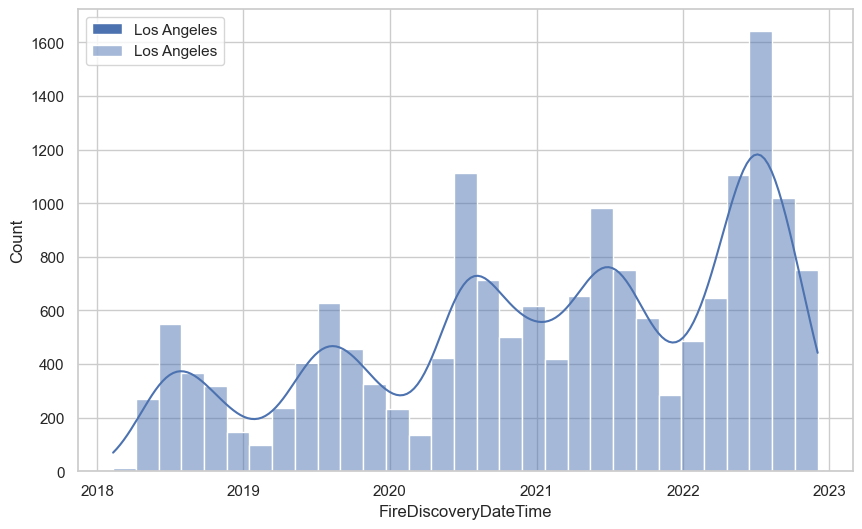

In [89]:
fig = plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
sns.histplot(df_LA_fires["FireDiscoveryDateTime"], label = 'Los Angeles', kde=True)
plt.legend() 

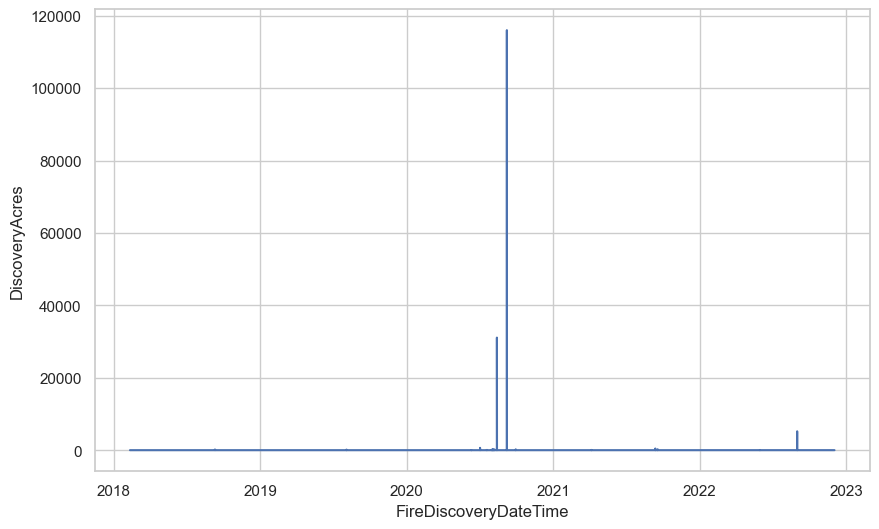

In [90]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.lineplot(x="FireDiscoveryDateTime", y="DiscoveryAcres", data=df_LA_fires)

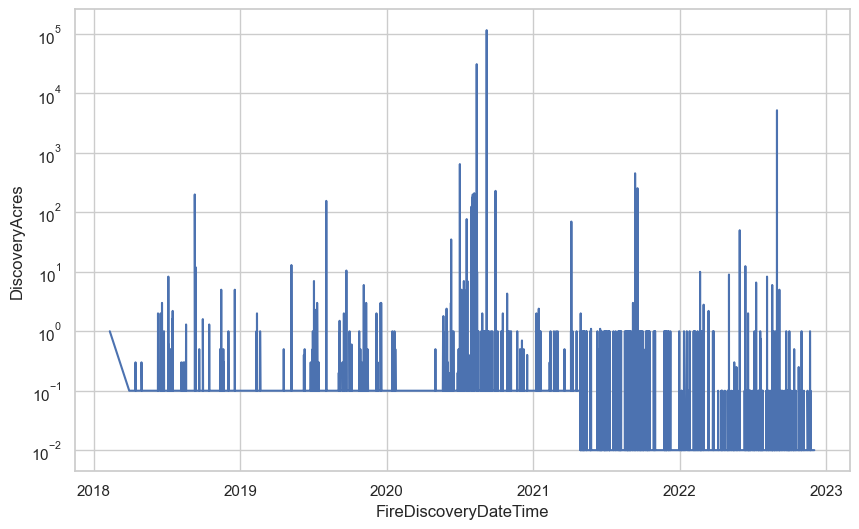

In [93]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="FireDiscoveryDateTime", y="DiscoveryAcres", data=df_LA_fires)
g.set_yscale("log")

In [95]:
df_LA_fires["DATE"] = pd.to_datetime(df_LA_fires["FireDiscoveryDateTime"]).dt.date
df_LA_fires["FireHappened"] = 1
df_LA_fires = df_LA_fires.filter(["DATE", "DiscoveryAcres", "FireHappened"])
df_LA_fires.head(10)

/var/folders/xb/3kyhyk0s6zv0y_tv20yntjcr0000gn/T/ipykernel_6781/1232804606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LA_fires["DATE"] = pd.to_datetime(df_LA_fires["FireDiscoveryDateTime"]).dt.date
/var/folders/xb/3kyhyk0s6zv0y_tv20yntjcr0000gn/T/ipykernel_6781/1232804606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LA_fires["FireHappened"] = 1


,DATE,DiscoveryAcres,FireHappened
0,2020-02-28,0.1,1
11,2019-02-25,0.1,1
16,2020-01-25,0.1,1
17,2018-05-29,0.1,1
19,2020-07-30,NaN,1
21,2020-08-30,0.1,1
22,2020-10-07,0.1,1
25,2020-07-07,0.1,1
29,2019-04-07,0.1,1
37,2020-04-27,0.1,1


In [96]:
df_LA_fires["DATE"] = pd.to_datetime(df_LA_fires["DATE"])
df_LA_fires.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16856 entries, 0 to 61303
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            16856 non-null  datetime64[ns]
 1   DiscoveryAcres  16672 non-null  float64       
 2   FireHappened    16856 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 526.8 KB


In [98]:
df_LA_fires.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DiscoveryAcres,16672.0,9.718185,931.828009,0.01,0.01,0.1,0.1,115997.0
FireHappened,16856.0,1.000000,0.000000,1.00,1.00,1.0,1.0,1.0


In [100]:
print("Time Range" , df_LA_fires["DATE"].min() , "to" , df_LA_fires["DATE"].max())

Time Range 2018-02-09 00:00:00 to 2022-12-02 00:00:00


In [73]:
df_weather = pd.read_csv('LA_weather_data.csv', na_values=[''], converters={'DATE': pd.to_datetime})
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127328 entries, 0 to 127327
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   STATION  127328 non-null  object        
 1   NAME     127328 non-null  object        
 2   DATE     127328 non-null  datetime64[ns]
 3   AWND     19530 non-null   float64       
 4   DAPR     276 non-null     float64       
 5   MDPR     272 non-null     float64       
 6   PGTM     1294 non-null    float64       
 7   PRCP     89271 non-null   float64       
 8   SNOW     38130 non-null   float64       
 9   SNWD     16901 non-null   float64       
 10  TAVG     41323 non-null   float64       
 11  TMAX     75007 non-null   float64       
 12  TMIN     74897 non-null   float64       
 13  TOBS     17562 non-null   float64       
 14  WDF2     19592 non-null   float64       
 15  WDF5     19152 non-null   float64       
 16  WSF2     19592 non-null   float64       
 17  WSF5     1

In [74]:
df_weather = df_weather[df_weather["STATION"]== "USW00023187"]
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1787 entries, 64813 to 66599
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1787 non-null   object        
 1   NAME     1787 non-null   object        
 2   DATE     1787 non-null   datetime64[ns]
 3   AWND     1715 non-null   float64       
 4   DAPR     0 non-null      float64       
 5   MDPR     0 non-null      float64       
 6   PGTM     330 non-null    float64       
 7   PRCP     1781 non-null   float64       
 8   SNOW     25 non-null     float64       
 9   SNWD     30 non-null     float64       
 10  TAVG     0 non-null      float64       
 11  TMAX     1776 non-null   float64       
 12  TMIN     1776 non-null   float64       
 13  TOBS     0 non-null      float64       
 14  WDF2     1773 non-null   float64       
 15  WDF5     1758 non-null   float64       
 16  WSF2     1773 non-null   float64       
 17  WSF5     1758 non-null   flo

In [75]:
df_weather = df_weather.filter(["DATE", "AWND", "PRCP","SNOW", "TMAX", "TMIN"])
df_weather.head()

,DATE,AWND,PRCP,SNOW,TMAX,TMIN
64813,2018-01-01,11.41,0.0,NaN,66.0,52.0
64814,2018-01-02,18.34,0.0,NaN,65.0,56.0
64815,2018-01-03,14.09,0.0,NaN,61.0,53.0
64816,2018-01-04,11.63,0.0,NaN,67.0,51.0
64817,2018-01-05,8.05,0.0,NaN,65.0,49.0


In [76]:
df_weather.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AWND,1715.0,13.546426,4.313060,5.59,10.51,12.53,15.66,65.09
PRCP,1781.0,0.032122,0.164896,0.00,0.00,0.00,0.00,2.07
SNOW,25.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00
TMAX,1776.0,69.490428,16.560190,30.00,56.00,69.00,84.00,107.00
TMIN,1776.0,51.111486,13.191161,22.00,41.00,50.00,62.00,83.00


<AxesSubplot: xlabel='DATE', ylabel='TMAX'>

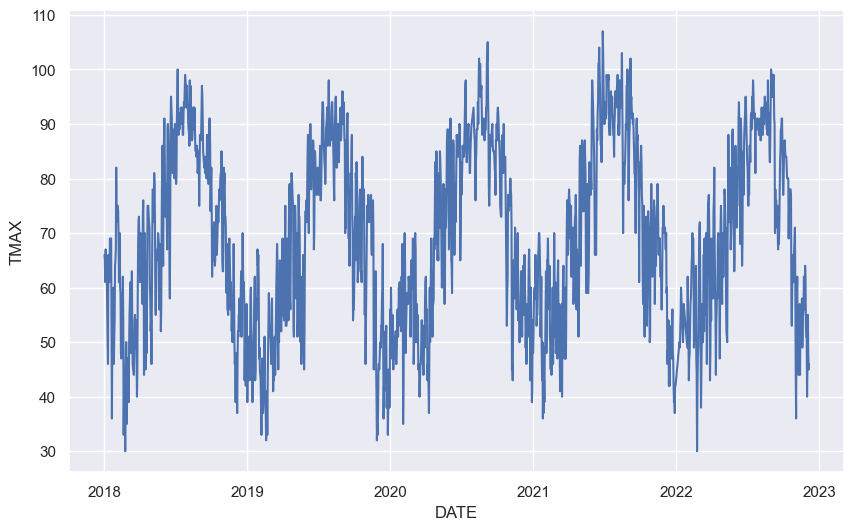

In [77]:
fig = plt.figure(figsize=(10,6))
sns.set(style="darkgrid")
sns.lineplot(data = df_weather, x="DATE", y="TMAX")

<AxesSubplot: xlabel='DATE', ylabel='PRCP'>

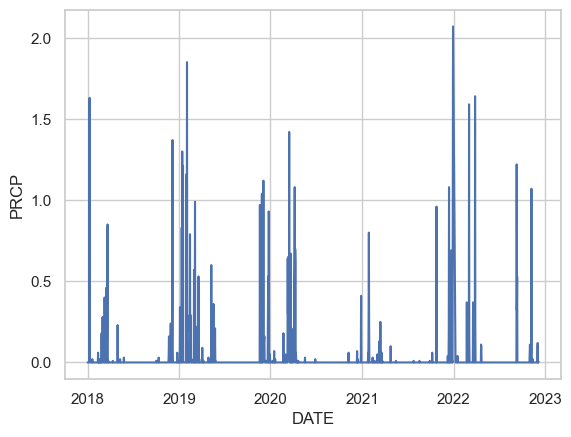

In [101]:
sns.set(style="whitegrid")
sns.lineplot(data = df_weather, x="DATE", y="PRCP")

In [102]:
df = pd.merge(df_weather, df_LA_fires, how="outer", on="DATE")
df.head(10)

,DATE,AWND,PRCP,SNOW,TMAX,TMIN,DiscoveryAcres,FireHappened
0,2018-01-01,11.41,0.00,NaN,66.0,52.0,NaN,NaN
1,2018-01-02,18.34,0.00,NaN,65.0,56.0,NaN,NaN
2,2018-01-03,14.09,0.00,NaN,61.0,53.0,NaN,NaN
3,2018-01-04,11.63,0.00,NaN,67.0,51.0,NaN,NaN
4,2018-01-05,8.05,0.00,NaN,65.0,49.0,NaN,NaN
5,2018-01-06,12.08,0.00,NaN,64.0,50.0,NaN,NaN
6,2018-01-07,12.08,0.00,NaN,62.0,48.0,NaN,NaN
7,2018-01-08,11.86,1.20,NaN,56.0,46.0,NaN,NaN
8,2018-01-09,18.34,1.63,NaN,50.0,40.0,NaN,NaN
9,2018-01-10,14.54,0.22,NaN,46.0,42.0,NaN,NaN


In [103]:
df = df.fillna(0)
df.head()

,DATE,AWND,PRCP,SNOW,TMAX,TMIN,DiscoveryAcres,FireHappened
0,2018-01-01,11.41,0.0,0.0,66.0,52.0,0.0,0.0
1,2018-01-02,18.34,0.0,0.0,65.0,56.0,0.0,0.0
2,2018-01-03,14.09,0.0,0.0,61.0,53.0,0.0,0.0
3,2018-01-04,11.63,0.0,0.0,67.0,51.0,0.0,0.0
4,2018-01-05,8.05,0.0,0.0,65.0,49.0,0.0,0.0


In [105]:
df.SNOW.unique()

array([0.])

/var/folders/xb/3kyhyk0s6zv0y_tv20yntjcr0000gn/T/ipykernel_6781/1328226485.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap= "coolwarm", annot= True, vmin=0, vmax=1)


<AxesSubplot: >

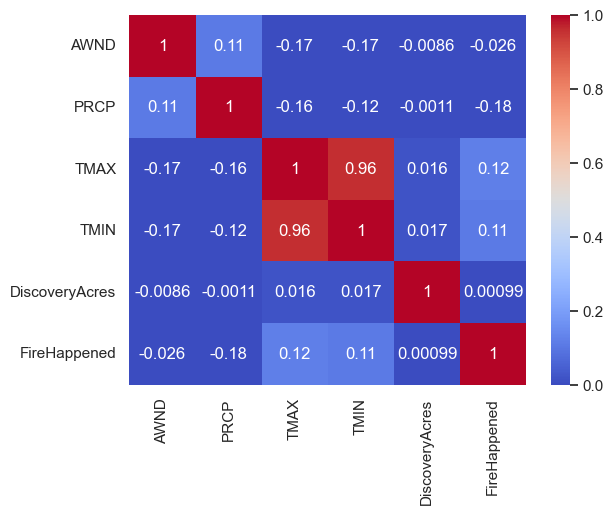

In [106]:
# All zero in SNOW, we can delete this column
df = df.filter(["DATE","AWND","PRCP","TMAX","TMIN","DiscoveryAcres","FireHappened"])
sns.heatmap(df.corr(), cmap= "coolwarm", annot= True, vmin=0, vmax=1)